$${\huge{Exercise}}$$

# <font color=teal> Correlation within Iris data set attributes.
   
    
<font size=4> We consider the [Iris data set from scikit learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)


In [10]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
#print(iris.DESCR)

<font size=4 color =teal> __Change iris.data into a  dataframe using iris.feature_names as the columns label.__    

In [13]:
features=pd.DataFrame(iris.data, columns=iris.feature_names)

<font size=4 color =teal> __Find the Correlation Matrix for the Data Frame and tell me what two features are most correlated__ 

In [14]:
features.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<font size =4 color=lightgreen> __Answer:__ petal length and petal width are most correlated (0.963)

<font size=4 color =teal> __Use Scikit learn to do a linear regression for X=petal length and y= petal width.__ 
* Graph the line along with the data ( use l0=np.linspace(0,8, 100) to generate the points you predict on)
* Print  the coefficients of the regression model
    
<font color =red> You may  have the most luck using the array iris.data.  Also you need to reshape from (150,) to (150,1) 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#renamed to reg just for ease of typing later on
reg=linear_model.LinearRegression()

In [24]:
petal_len=iris.data[:,2].reshape(-1,1)      # 2 is column index for petal length
petal_width=iris.data[:,3].reshape(-1,1)    # 3 is column index for petal width
                            # ^ reshape data to make a 2D array

petal_len.shape

(150, 1)

-0.36307552131902976
0.4157554163524117


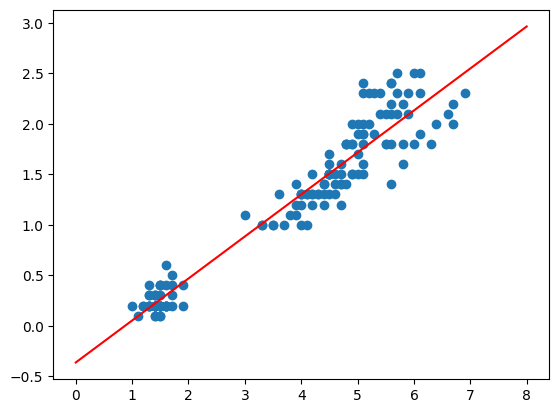

In [25]:
reg.fit(petal_len,petal_width) 
alpha=reg.intercept_[0]        # a > alpha
beta=reg.coef_[0][0]           # b > beta
l0=np.linspace(0, 8, 100)      # l0 > line 0 ?   
                # ^ linspace needs to go as far as data points do

plt.plot(l0, reg.predict(l0.reshape(-1,1)), "r")
plt.scatter(petal_len,petal_width)
print(alpha,beta,sep='\n')

<font size=4 color=teal>__Use this to predict what the   petal width will be if the petal length is 3__

In [26]:
reg.predict([[3]])

array([[0.88419073]])

<font size=4 color=teal>__What is the $R^2$?__ 

In [27]:
reg.score(petal_len,petal_width)

0.9271098389904927

<font size=4 color=teal>__Repeat for  a quadratic fit. Plot and compare.__

In [28]:
poly_f=PolynomialFeatures(degree=2,include_bias=False)
petal_len_poly=poly_f.fit_transform(petal_len)
reg.fit(petal_len_poly,petal_width)
print("Quadratic fit",reg.score(petal_len_poly,petal_width))

# a, b, c
reg.intercept_,reg.coef_

Quadratic fit 0.9271679557444837


(array([-0.38678103]), array([[ 0.43383349, -0.00256892]]))

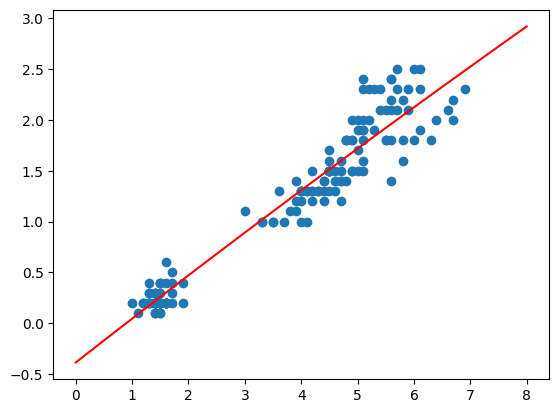

In [29]:
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
plt.scatter(petal_len,petal_width)

<font size=4 color=teal>__Why does it look so similar to the linear fit?__ 

<font size =4 color=lightgreen> __Answer:__ C is really close to zero, $x^2$ isn't having much effect

<font size=4 color=teal>__What about a polynomial of degree 4? Plot and compare.__  

In [30]:
poly_f=PolynomialFeatures(degree=4,include_bias=False)
petal_len_poly=poly_f.fit_transform(petal_len)
reg.fit(petal_len_poly,petal_width)
print("Quadratic fit",reg.score(petal_len_poly,petal_width))

reg.intercept_,reg.coef_

Quadratic fit 0.9373432006856651


(array([-0.46158868]),
 array([[ 0.82110549, -0.34324572,  0.08944371, -0.00714685]]))

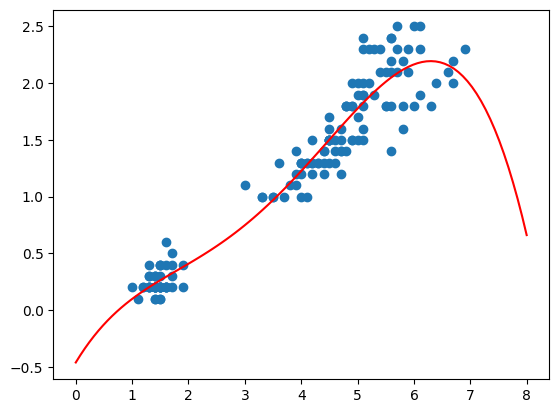

In [31]:
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
plt.scatter(petal_len,petal_width)

<font size=4 color=teal>__Just looking at the graph do you like this better or worse?__  

<font size=4 color =lightgreen> __Answer:__ The $R^2$ is better, but it looks like the model is overfitted. This means the model will be worse when applied to new data.

If we withheld testing data, the $R^2$ would probably be worse for the training data.